In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
class KnapsackProblem:
    def __init__(self, values, weights, capacity):
        self.values = np.array(values)
        self.weights = np.array(weights)
        self.capacity = capacity
        self.n_items = len(values)

    def fitness(self, individual):
        """Fitness with penalty for exceeding capacity."""
        total_value = np.sum(individual * self.values)
        total_weight = np.sum(individual * self.weights)

        if total_weight <= self.capacity:
            return total_value
        else:
            penalty = 10 * (total_weight - self.capacity)
            return total_value - penalty


In [8]:
class GeneticAlgorithm:
    def __init__(self,
                 problem: KnapsackProblem,
                 pop_size=50,
                 generations=150,
                 crossover_rate=0.8,
                 mutation_rate=0.05,
                 tournament_size=3,
                 elitism=True,
                 seed=None):
        self.problem = problem
        self.pop_size = pop_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.tournament_size = tournament_size
        self.elitism = elitism
        self.history = {"best": [], "avg": []}
        if seed is not None:
            np.random.seed(seed)
            random.seed(seed)

    # -----------------------------
    # Population Initialization
    # -----------------------------
    def initialize_population(self):
        return np.random.randint(2, size=(self.pop_size, self.problem.n_items))

    # -----------------------------
    # Selection
    # -----------------------------
    def tournament_selection(self, pop, fitnesses):
        selected = []
        for _ in range(self.pop_size):
            idx = np.random.choice(range(self.pop_size), self.tournament_size, replace=False)
            winner = pop[idx[np.argmax(fitnesses[idx])]]
            selected.append(winner)
        return np.array(selected)

    # -----------------------------
    # Crossover
    # -----------------------------
    def crossover(self, parent1, parent2):
        if random.random() < self.crossover_rate:
            point = random.randint(1, self.problem.n_items - 1)
            child1 = np.concatenate((parent1[:point], parent2[point:]))
            child2 = np.concatenate((parent2[:point], parent1[point:]))
            return child1, child2
        return parent1.copy(), parent2.copy()

    # -----------------------------
    # Mutation
    # -----------------------------
    def mutate(self, individual):
        for i in range(self.problem.n_items):
            if random.random() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    # -----------------------------
    # Evolution Step
    # -----------------------------
    def evolve(self, pop):
        fitnesses = np.array([self.problem.fitness(ind) for ind in pop])
        next_pop = []

        # Elitism
        if self.elitism:
            elite = pop[np.argmax(fitnesses)].copy()
            next_pop.append(elite)

        selected = self.tournament_selection(pop, fitnesses)
        for i in range(0, self.pop_size - len(next_pop), 2):
            parent1, parent2 = selected[i], selected[i + 1]
            child1, child2 = self.crossover(parent1, parent2)
            next_pop.extend([self.mutate(child1), self.mutate(child2)])

        return np.array(next_pop[:self.pop_size]), fitnesses

    # -----------------------------
    # Training Loop
    # -----------------------------
    def train(self, verbose=True):
        pop = self.initialize_population()

        for gen in range(self.generations):
            pop, fitnesses = self.evolve(pop)
            best = np.max(fitnesses)
            avg = np.mean(fitnesses)
            self.history["best"].append(best)
            self.history["avg"].append(avg)

            if verbose and gen % 10 == 0:
                print(f"Gen {gen:03d} | Best: {best:.2f} | Avg: {avg:.2f}")

        # Final evaluation
        final_fitnesses = np.array([self.problem.fitness(ind) for ind in pop])
        best_idx = np.argmax(final_fitnesses)
        self.best_individual = pop[best_idx]
        self.best_value = np.sum(self.best_individual * self.problem.values)
        self.best_weight = np.sum(self.best_individual * self.problem.weights)

        return self.best_individual, self.best_value, self.best_weight

    # -----------------------------
    # Visualization
    # -----------------------------
    def plot_fitness(self):
        plt.figure(figsize=(8, 5))
        plt.plot(self.history["best"], label='Best Fitness')
        plt.plot(self.history["avg"], label='Average Fitness', linestyle='--')
        plt.title("GA – Fitness Evolution")
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_items(self):
        """Visualize selected items (value vs weight)."""
        selected = self.best_individual.astype(bool)
        values, weights = self.problem.values, self.problem.weights

        plt.figure(figsize=(7, 5))
        plt.scatter(weights, values, color='gray', label='Unselected')
        plt.scatter(weights[selected], values[selected], color='green', label='Selected')
        for i, (w, v) in enumerate(zip(weights, values)):
            plt.text(w + 0.1, v, str(i), fontsize=8)
        plt.axvline(self.problem.capacity, color='red', linestyle='--', label='Capacity Limit')
        plt.title(f"Selected Items (Total W={self.best_weight}, V={self.best_value})")
        plt.xlabel("Weight")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True)
        plt.show()


# Simple Example


In [9]:
values_simple = np.array([10, 5, 15, 7, 6, 18, 3, 12, 8, 9])
weights_simple = np.array([2, 3, 5, 7, 1, 4, 1, 6, 3, 2])
capacity_simple = 15

Gen 000 | Best: 56.00 | Avg: 3.45
Gen 010 | Best: 61.00 | Avg: 47.02
Gen 020 | Best: 61.00 | Avg: 49.10
Gen 030 | Best: 61.00 | Avg: 51.95
Gen 040 | Best: 61.00 | Avg: 47.85
Gen 050 | Best: 61.00 | Avg: 50.60
Gen 060 | Best: 61.00 | Avg: 53.88
Gen 070 | Best: 61.00 | Avg: 51.99
Gen 080 | Best: 61.00 | Avg: 52.26
Gen 090 | Best: 61.00 | Avg: 48.96
Gen 100 | Best: 61.00 | Avg: 51.08
Gen 110 | Best: 61.00 | Avg: 48.80
Gen 120 | Best: 61.00 | Avg: 46.76
Gen 130 | Best: 61.00 | Avg: 52.54
Gen 140 | Best: 61.00 | Avg: 50.77
Gen 150 | Best: 61.00 | Avg: 50.52
Gen 160 | Best: 61.00 | Avg: 51.62
Gen 170 | Best: 61.00 | Avg: 50.76
Gen 180 | Best: 61.00 | Avg: 52.81
Gen 190 | Best: 61.00 | Avg: 48.21

✅ Best Solution Found
Chromosome: [1 0 1 0 1 1 1 0 0 1]
Total Value: 61
Total Weight: 15


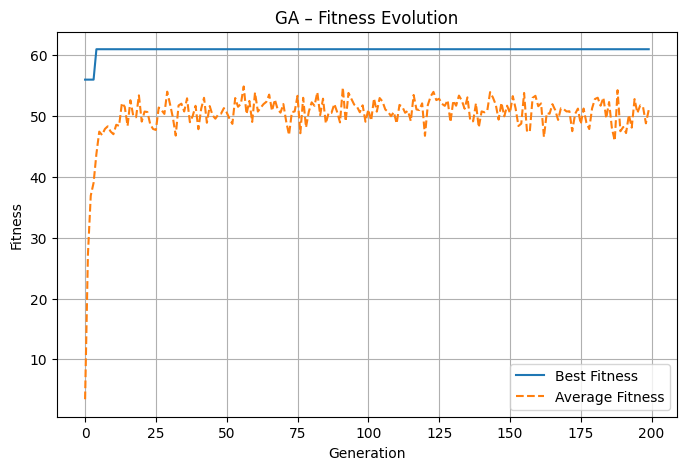

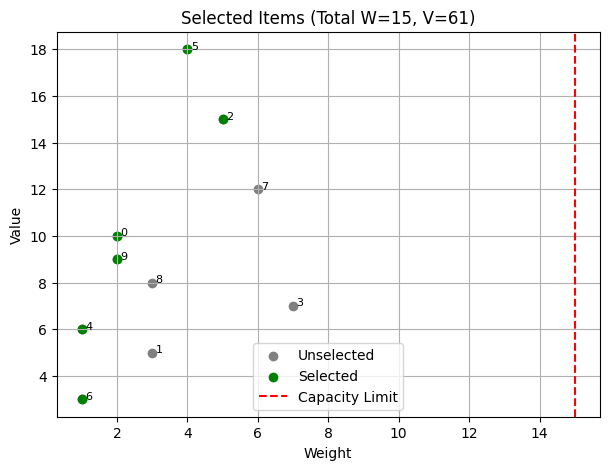

In [10]:
problem_adv = KnapsackProblem(values_simple, weights_simple, capacity_simple)

# Configure GA hyperparameters
ga = GeneticAlgorithm(
    problem_adv,
    pop_size=80,
    generations=200,
    crossover_rate=0.8,
    mutation_rate=0.05,
    elitism=True,
    seed=42
)

best_ind, best_val, best_wt = ga.train(verbose=True)

print("\n✅ Best Solution Found")
print("Chromosome:", best_ind)
print("Total Value:", best_val)
print("Total Weight:", best_wt)

# Visualization
ga.plot_fitness()
ga.plot_items()


# Advanced Example

In [11]:
# Larg number of possible items
np.random.seed(42)  # for reproducibility
n_items = 60

# Generate structured item sets
# We mix several item "types" to make the problem multimodal and deceptive

# Base random values and weights
values_adv = np.random.randint(10, 400, n_items)
weights_adv = np.random.randint(1, 50, n_items)

# Introduce item correlations
# Some high-value items are extremely heavy
heavy_idx = np.random.choice(n_items, 10, replace=False)
values_adv[heavy_idx] *= 2
weights_adv[heavy_idx] *= 3

# Some items are "efficient but scarce" (high value/weight ratio)
efficient_idx = np.random.choice(list(set(range(n_items)) - set(heavy_idx)), 8, replace=False)
values_adv[efficient_idx] *= 2
weights_adv[efficient_idx] //= 2
weights_adv[weights_adv == 0] = 1  # prevent zeros

# A few are "deceptive" (look good, but overweight for value)
deceptive_idx = np.random.choice(list(set(range(n_items)) - set(heavy_idx) - set(efficient_idx)), 5, replace=False)
values_adv[deceptive_idx] //= 3
weights_adv[deceptive_idx] *= 2

# Knapsack capacity — tuned so it’s tight, forcing tradeoffs
capacity_adv = int(np.sum(weights_adv) * 0.3)

# Show summary
print(f"Items: {n_items}, Capacity: {capacity_adv}")
print(f"Value range: {values_adv.min()}–{values_adv.max()}, Weight range: {weights_adv.min()}–{weights_adv.max()}")


Items: 60, Capacity: 599
Value range: 23–794, Weight range: 1–141


Gen 000 | Best: 6410.00 | Avg: 3996.28
Gen 010 | Best: 8978.00 | Avg: 7852.09
Gen 020 | Best: 9594.00 | Avg: 8423.88
Gen 030 | Best: 9804.00 | Avg: 8433.10
Gen 040 | Best: 9875.00 | Avg: 8522.54
Gen 050 | Best: 9875.00 | Avg: 8314.11
Gen 060 | Best: 9875.00 | Avg: 8535.33
Gen 070 | Best: 10132.00 | Avg: 8581.60
Gen 080 | Best: 10132.00 | Avg: 8461.56
Gen 090 | Best: 10132.00 | Avg: 8648.81
Gen 100 | Best: 10132.00 | Avg: 8679.66
Gen 110 | Best: 10132.00 | Avg: 8660.21
Gen 120 | Best: 10132.00 | Avg: 8518.25
Gen 130 | Best: 10147.00 | Avg: 8846.29
Gen 140 | Best: 10150.00 | Avg: 8607.85
Gen 150 | Best: 10150.00 | Avg: 8727.11
Gen 160 | Best: 10150.00 | Avg: 8563.10
Gen 170 | Best: 10150.00 | Avg: 8819.61
Gen 180 | Best: 10150.00 | Avg: 8715.79
Gen 190 | Best: 10150.00 | Avg: 8637.79

✅ Best Solution Found
Chromosome: [0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1
 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1]
Total Value: 10200
Total Weight: 604


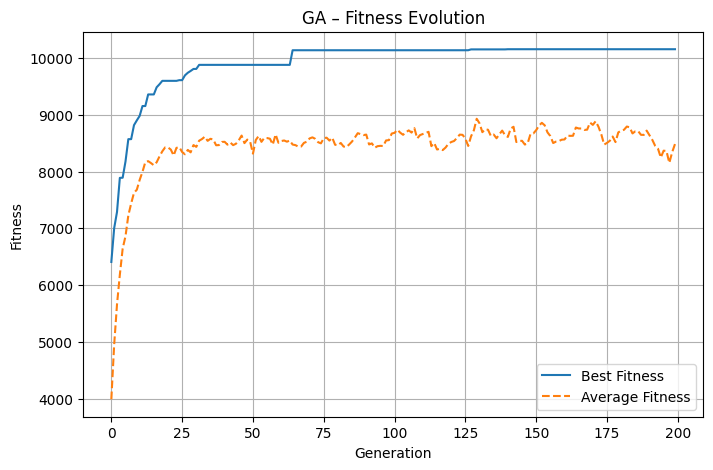

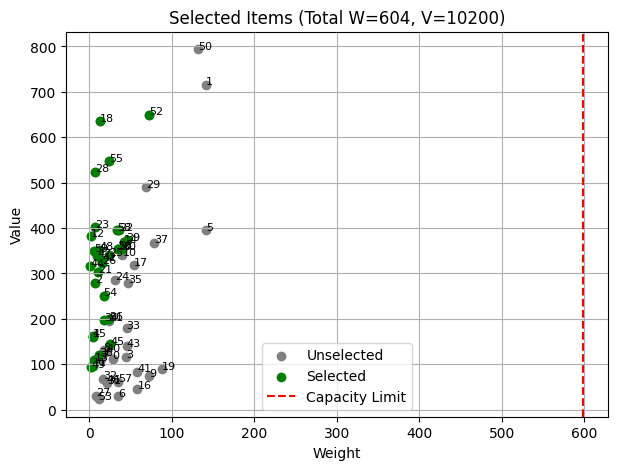

In [12]:
problem_adv = KnapsackProblem(values_adv, weights_adv, capacity_adv)

# Configure GA hyperparameters
ga = GeneticAlgorithm(
    problem_adv,
    pop_size=80,
    generations=200,
    crossover_rate=0.8,
    mutation_rate=0.05,
    elitism=True,
    seed=42
)

best_ind, best_val, best_wt = ga.train(verbose=True)

print("\n✅ Best Solution Found")
print("Chromosome:", best_ind)
print("Total Value:", best_val)
print("Total Weight:", best_wt)

# Visualization
ga.plot_fitness()
ga.plot_items()


# Functionalizing the data generation

In [13]:
import numpy as np

def generate_knapsack_dataset(
    n_items=60,
    capacity_ratio=0.3,
    n_heavy=10,
    n_efficient=8,
    n_deceptive=5,
    value_range=(10, 400),
    weight_range=(1, 50),
    heavy_value_mult=2,
    heavy_weight_mult=3,
    efficient_value_mult=2,
    efficient_weight_div=2,
    deceptive_value_div=3,
    deceptive_weight_mult=2,
    seed=None
):
    """
    Generate a structured knapsack dataset with heavy, efficient, and deceptive items.

    Parameters
    ----------
    n_items : int
        Number of available items.
    capacity_ratio : float
        Fraction of total weight to set as knapsack capacity.
    n_heavy : int
        Number of "heavy" items (high value, very heavy).
    n_efficient : int
        Number of "efficient" items (high value/weight ratio).
    n_deceptive : int
        Number of "deceptive" items (look good but inefficient).
    value_range : tuple(int, int)
        Range (min, max) for base random item values.
    weight_range : tuple(int, int)
        Range (min, max) for base random item weights.
    heavy_value_mult, heavy_weight_mult : float
        Multipliers for heavy item type.
    efficient_value_mult, efficient_weight_div : float
        Adjustments for efficient items.
    deceptive_value_div, deceptive_weight_mult : float
        Adjustments for deceptive items.
    seed : int, optional
        Random seed for reproducibility.

    Returns
    -------
    values : np.ndarray
        Item values.
    weights : np.ndarray
        Item weights.
    capacity : int
        Knapsack capacity (tightness based on capacity_ratio).
    info : dict
        Indices of item types (heavy, efficient, deceptive).
    """
    if seed is not None:
        np.random.seed(seed)

    # Base random generation
    values = np.random.randint(value_range[0], value_range[1], n_items)
    weights = np.random.randint(weight_range[0], weight_range[1], n_items)

    all_indices = np.arange(n_items)

    # Assign item roles
    heavy_idx = np.random.choice(all_indices, min(n_heavy, n_items), replace=False)
    remaining = np.setdiff1d(all_indices, heavy_idx)

    efficient_idx = np.random.choice(remaining, min(n_efficient, len(remaining)), replace=False)
    remaining = np.setdiff1d(remaining, efficient_idx)

    deceptive_idx = np.random.choice(remaining, min(n_deceptive, len(remaining)), replace=False)

    # Modify heavy items
    values[heavy_idx] *= heavy_value_mult
    weights[heavy_idx] *= heavy_weight_mult

    # Modify efficient items
    values[efficient_idx] *= efficient_value_mult
    weights[efficient_idx] //= efficient_weight_div
    weights[weights == 0] = 1  # prevent zero weights

    # Modify deceptive items
    values[deceptive_idx] //= deceptive_value_div
    weights[deceptive_idx] *= deceptive_weight_mult

    # Set knapsack capacity relative to total weight
    capacity = int(np.sum(weights) * capacity_ratio)

    # Return everything
    info = {
        "heavy": heavy_idx,
        "efficient": efficient_idx,
        "deceptive": deceptive_idx
    }

    return values, weights, capacity, info


In [16]:
values_mon, weights_mon, capacity_mon, info = generate_knapsack_dataset(
    n_items=100000,
    capacity_ratio=0.3,
    seed=42,
    n_heavy=10000,
    n_efficient=1000,
    n_deceptive=1000
)

print(f"Items: {len(values_mon)}, Capacity: {capacity_mon}")
print(f"Value range: {values_mon.min()}–{values_mon.max()}, Weight range: {weights_mon.min()}–{weights_mon.max()}")
print("Heavy items:", info["heavy"])
print("Efficient items:", info["efficient"])
print("Deceptive items:", info["deceptive"])


Items: 100000, Capacity: 901111
Value range: 3–798, Weight range: 1–147
Heavy items: [72055 70985 38671 ... 40153 68418 71814]
Efficient items: [21399 53388 78071 53240  5561 13677 95626 22354 66029 42238 42389 18334
 60846 23022 77726 42842 86295 23388 38955 69342 75582 57487 71800 56498
 90360 40872 49595 31250 88574 69484 62247 63939 56096 35880 18342 20696
 71267 58160 84879 21992 57954 14303 58193 86659 89789 25400 44196 37263
  6722 72344 80550 61947 63562 16170 67075 39330 27929 34052 32701  6197
 38920 41399 96659 43874 10457 81478 68684 39900 83565 14759 85558 88084
 92864 83513 35169 45484 56680 95677 92078 78842  8621  2312 48186 39383
 73407 83898 41284 41423 97092 19987 17050 90485 73071 71118 59891 96003
 77600 72409 18918 36547 21784 27589 44772 59887 51329 73625 49523 75160
 17690 71696 32357 80048 10448 18829  5356 90607 42925 71627 94405 22012
 99624 96012 56686 80545 79085  5082 19431 36723 13190 18954 28384 45045
  5036 52879 46770  3882 13891 18110 79311 18493 2775

# Monster example test

Gen 000 | Best: 5379760.00 | Avg: 5280712.14
Gen 010 | Best: 5515252.00 | Avg: 5439154.06
Gen 020 | Best: 5593139.00 | Avg: 5494925.45
Gen 030 | Best: 5593139.00 | Avg: 5517300.95
Gen 040 | Best: 5635529.00 | Avg: 5524291.84
Gen 050 | Best: 5635529.00 | Avg: 5535376.05
Gen 060 | Best: 5635529.00 | Avg: 5538550.06
Gen 070 | Best: 5647707.00 | Avg: 5542438.11
Gen 080 | Best: 5662646.00 | Avg: 5563754.90
Gen 090 | Best: 5662646.00 | Avg: 5552909.04
Gen 100 | Best: 5662646.00 | Avg: 5543174.65
Gen 110 | Best: 5667117.00 | Avg: 5561293.49
Gen 120 | Best: 5667117.00 | Avg: 5566878.95
Gen 130 | Best: 5673532.00 | Avg: 5545942.83
Gen 140 | Best: 5673532.00 | Avg: 5552400.53
Gen 150 | Best: 5673532.00 | Avg: 5557754.34
Gen 160 | Best: 5673532.00 | Avg: 5565929.72
Gen 170 | Best: 5676384.00 | Avg: 5556982.47
Gen 180 | Best: 5676384.00 | Avg: 5557104.53
Gen 190 | Best: 5687283.00 | Avg: 5572393.74

✅ Best Solution Found
Chromosome: [1 1 0 ... 1 0 0]
Total Value: 11300581
Total Weight: 1460869


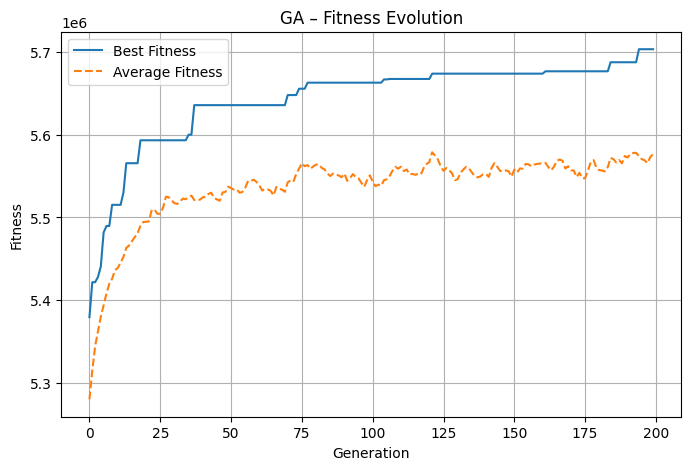

/home/haarmeggido/Repos/Evolutionary_algorithms/evolutionary-knapsack-problem/knapsack-venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


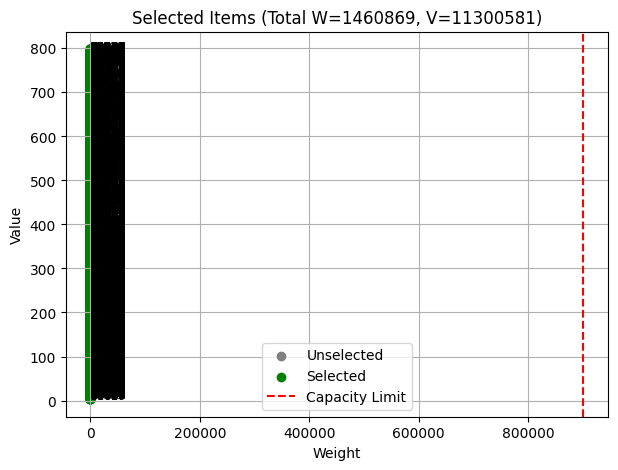

In [17]:
problem_adv = KnapsackProblem(values_mon, weights_mon, capacity_mon)

# Configure GA hyperparameters
ga = GeneticAlgorithm(
    problem_adv,
    pop_size=80,
    generations=200,
    crossover_rate=0.8,
    mutation_rate=0.05,
    elitism=True,
    seed=42
)

best_ind, best_val, best_wt = ga.train(verbose=True)

print("\n✅ Best Solution Found")
print("Chromosome:", best_ind)
print("Total Value:", best_val)
print("Total Weight:", best_wt)

# Visualization
ga.plot_fitness()
ga.plot_items()
